In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

import btrdb
import yaml
from btrdb.utils import timez

In [6]:
# Make sure you add your API key to the config file to connect!
with open('config.yaml', 'r') as f:
    config = yaml.safe_load(f)
    
db = btrdb.connect(config['connection']['api_url'], config['connection']['api_key'])

In [14]:
def describe_streams(streams):
    table = [["Collection", "Name", "Units", "Version", "Earliest", "Latest"]]
    for stream in streams:
        tags = stream.tags()
        table.append([
            stream.collection, stream.name, tags["unit"], stream.version(), 
            stream.earliest()[0].time, stream.latest()[0].time, 
        ])
    return tabulate(table, headers="firstrow")

In [32]:
#Choosing streams; we'll choose all voltage angle streams.
streams = db.streams_in_collection('lndunn/events/switching_A')
uuids = [s.uuid for s in streams if 'pos_Vang' in s.name]

start, _ = streams[0].earliest()
end, _ = streams[0].latest()

In [33]:
len(uuids)

23

In [34]:
streamset = db.streams(*uuids).filter(start.time, end.time)
df = streamset.to_dataframe()

In [36]:
df.rename(columns=dict(zip(df.keys(), [key.split('/')[-2] for key in df.keys()])), inplace=True)

In [37]:
df.head()

,StationB_Line2,StationG_Line4,StationA_Line5,StationF_Line1,StationA_Line2,StationE_Line2,StationB_Line1,StationD_Line3,StationC_Line1,StationG_Line2,...,StationA_Line3,StationG_Line1,StationG_Line3,StationI_Line1,StationA_Line4,StationD_Line2,StationB_Line3,StationI_Line2,StationD_Line1,StationH_Line1
time,,,,,,,,,,,,,,,,,,,,,
1577836800000000000,-159.1877,102.6909,-150.5170,-148.3199,-150.5170,-140.8652,-159.1877,-142.3416,-135.0631,-137.2999,...,-150.5170,-137.2999,-137.2999,86.2026,-150.5170,-142.3416,-159.1877,66.8183,-142.3416,-140.8984
1577836800033332992,-158.8428,103.0881,-150.1158,-147.9141,-150.1158,-140.4736,-158.8428,-141.9520,-134.6665,-136.9011,...,-150.1158,-136.9011,-136.9011,86.6048,-150.1158,-141.9520,-158.8428,67.2145,-141.9520,-140.4998
1577836800066667008,-158.5482,103.4877,-149.7167,-147.5049,-149.7167,-140.0726,-158.5482,-141.5624,-134.2685,-136.5010,...,-149.7167,-136.5010,-136.5010,86.9663,-149.7167,-141.5624,-158.5482,67.5746,-141.5624,-140.0987
1577836800100000000,-158.1463,103.8858,-149.3266,-147.1085,-149.3266,-139.6772,-158.1463,-141.1613,-133.8731,-136.1048,...,-149.3266,-136.1048,-136.1048,87.3620,-149.3266,-141.1613,-158.1463,67.9661,-141.1613,-139.6995
1577836800133332992,-157.7229,104.2798,-148.9337,-146.7268,-148.9337,-139.2819,-157.7229,-140.7659,-133.4821,-135.7116,...,-148.9337,-135.7116,-135.7116,87.7814,-148.9337,-140.7659,-157.7229,68.4042,-140.7659,-139.3054


In [77]:
ref = df.keys()[0]
diff = pd.DataFrame(index=df.index)
for key in df.keys()[1:]:
    diff[key] = np.radians(df[key] - df[ref])

In [82]:
diff.head()

,StationG_Line4,StationA_Line5,StationF_Line1,StationA_Line2,StationE_Line2,StationB_Line1,StationD_Line3,StationC_Line1,StationG_Line2,StationB_Line4,...,StationA_Line3,StationG_Line1,StationG_Line3,StationI_Line1,StationA_Line4,StationD_Line2,StationB_Line3,StationI_Line2,StationD_Line1,StationH_Line1
time,,,,,,,,,,,,,,,,,,,,,
1577836800000000000,4.570644,0.151332,0.189679,0.151332,0.319788,0.0,0.294020,0.421054,0.382014,0.0,...,0.151332,0.382014,0.382014,4.282869,0.151332,0.294020,0.0,3.944549,0.294020,0.319209
1577836800033332992,4.571557,0.152315,0.190742,0.152315,0.320603,0.0,0.294800,0.421956,0.382955,0.0,...,0.152315,0.382955,0.382955,4.283869,0.152315,0.294800,0.0,3.945444,0.294800,0.320146
1577836800066667008,4.573389,0.154139,0.192742,0.154139,0.322460,0.0,0.296458,0.423761,0.384796,0.0,...,0.154139,0.384796,0.384796,4.285036,0.154139,0.296458,0.0,3.946587,0.296458,0.322005
1577836800100000000,4.573323,0.153933,0.192646,0.153933,0.322347,0.0,0.296444,0.423647,0.384697,0.0,...,0.153933,0.384697,0.384697,4.284928,0.153933,0.296444,0.0,3.946406,0.296444,0.321957
1577836800133332992,4.572810,0.153400,0.191918,0.153400,0.321856,0.0,0.295955,0.423082,0.384170,0.0,...,0.153400,0.384170,0.384170,4.284858,0.153400,0.295955,0.0,3.946662,0.295955,0.321446


In [93]:
print(np.degrees(4.570644))
(df['StationG_Line4']-df[ref]).head()

261.87861085679265


time
1577836800000000000    261.8786
1577836800033332992    261.9309
1577836800066667008    262.0359
1577836800100000000    262.0321
1577836800133332992    262.0027
dtype: float64

In [97]:
len(diff)

1800

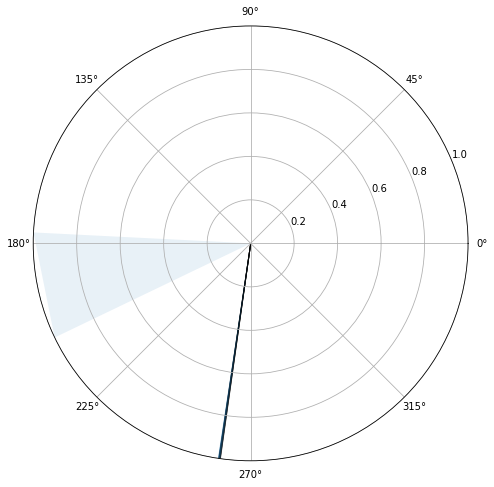

In [99]:
key = 'StationG_Line4'
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='polar')

ax.fill_betweenx([0, 1], diff[key].mean()-diff[key].std(), diff[key].mean()+diff[key].std(), alpha=0.1)
for i in range(0, len(diff),100):
    ax.arrow(0, 0, diff[key].iloc[i], 1, alpha=0.2)


ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0,1)
plt.show()

<AxesSubplot:xlabel='time'>

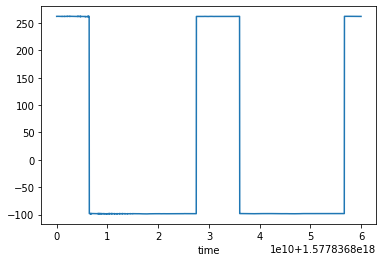

In [101]:
np.degrees(diff[key]).plot()

In [86]:
np.cos(diff[key].iloc[0]), np.sin(diff[key].iloc[0])

(-0.14127099639243731, -0.9899709619874151)

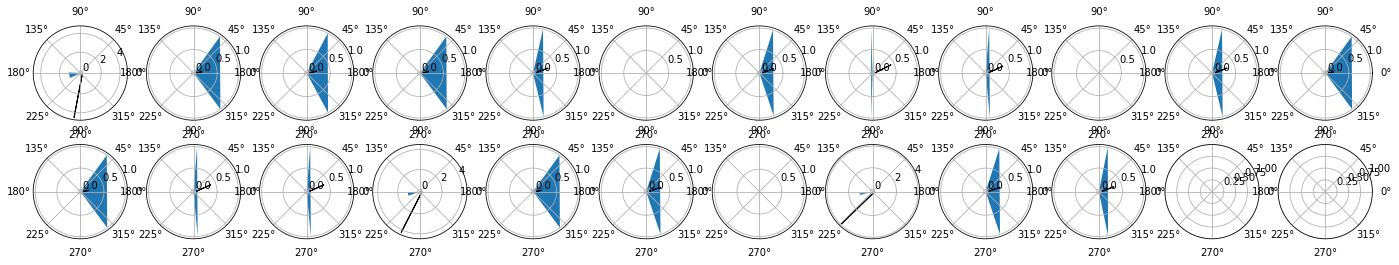

In [81]:
fig, ax = plt.subplots(nrows=2, ncols=12, figsize=(12*2,2*2), subplot_kw={'projection': 'polar'})
for i, key in enumerate(diff.keys()):
    m = int(i/ax.shape[1])
    n = i%ax.shape[1]
    
    ax[m,n].arrow(0, 0, diff[key].iloc[0], diff[key].iloc[0])
    ax[m,n].fill_betweenx([0,1], diff[key].mean()+diff[key].std(), diff[key].mean()-diff[key].std())
    
for m in range(ax.shape[0]):
    for n in range(ax.shape[1]):
        pass
#         ax[m,n].set_yticks([])
#         ax[m,n].set_xticks([])
    
plt.show()